<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/0616_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston 주택 가격 예측 모델

In [3]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [4]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [5]:
# # 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis = 0)
# # 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
train_data -= mean
# # 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis = 0)
train_data /= std
# # 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

In [19]:
# 훈련 데이터를 검증 데이터로 나누기
x_val = train_data[:100]
partial_x_train = train_data[100:]

y_val = train_labels[:100]
partial_y_train = train_labels[100:]

print(len(partial_x_train))
print(len(partial_y_train))
print(len(x_val))
print(len(y_val))


304
304
100
100


In [21]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Clear the Keras backend session
tf.keras.backend.clear_session()

# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(layers.Input(shape = (train_data.shape[1], ))) # Corrected input shape
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1)) # Removed softmax activation for regression

model.compile(loss = 'mse', optimizer = 'Adam', metrics = ['mae'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [23]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data,
                    train_labels,
                    epochs = 40,
                    batch_size = 32,
                    validation_data = (test_data, test_labels), # validation_data 수정
                    callbacks= [early_stopping_cb])

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 564.2927 - mae: 21.8669 - val_loss: 546.2703 - val_mae: 21.5962
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 516.9980 - mae: 20.7743 - val_loss: 476.0120 - val_mae: 20.0424
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 437.9185 - mae: 18.9989 - val_loss: 390.7264 - val_mae: 18.0029
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 360.4514 - mae: 16.9347 - val_loss: 286.5338 - val_mae: 15.1821
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 258.9512 - mae: 14.1700 - val_loss: 177.4821 - val_mae: 11.5987
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 164.1399 - mae: 10.6200 - val_loss: 94.0838 - val_mae: 8.2259
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 96.0916 - mae: 7.5787 - val_loss: 56.2073 - val_mae: 6.0410
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 71.8182 - mae: 6.6697 - val_loss: 42.8145 - val_mae: 5.1426
Epoch 9/40
13/13 ━━━━━━━━━━━━━━━

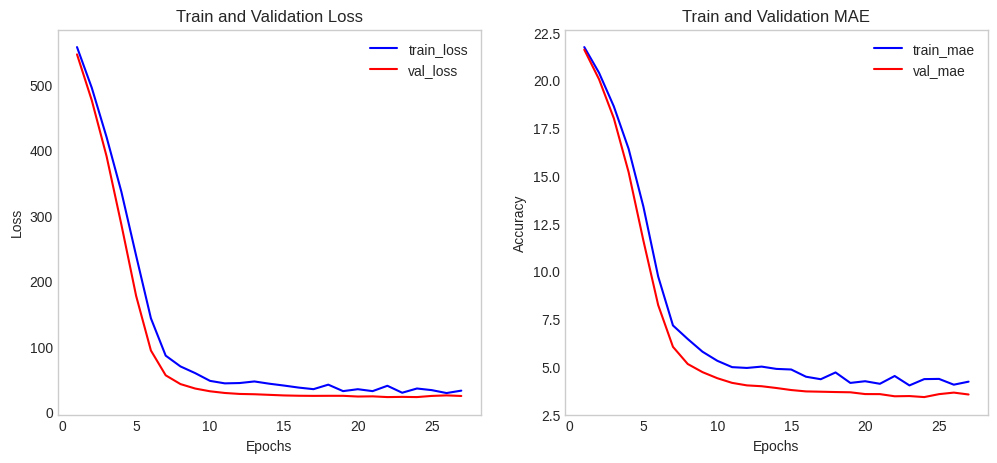

In [25]:
import matplotlib.pyplot as plt

# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-v0_8-whitegrid') # Corrected style name

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [30]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(f'Test MSE: {test_mse_score}, Test MAE: {test_mae_score}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.2702 - mae: 3.2830 
Test MSE: 22.973358154296875, Test MAE: 3.452916145324707


# Reuters 딥러닝 모델

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [48]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from tensorflow.keras.datasets import reuters
from sklearn.model_selection import train_test_split

# Load data with num_words=10000
(x_train_full, y_train_full), (x_test, y_test) = reuters.load_data(num_words=10000)

# Split training data with 25% for validation
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.25)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(x_train))
print(len(x_val))
print(len(x_test))
print(len(set(y_train)))

6736
2246
2246
46


In [63]:
import numpy as np

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

def one_hot_encoding(sequences, dim =10000):
  results = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    indices = np.array(sequence, dtype=int)
    valid_indices = indices[indices < dim]
    results[i, valid_indices] = 1. # Use the valid integer indices
  return results

# 훈련 데이터, 검증 데이터, 테스트 데이터를 벡터로 변환합니다.
x_train = one_hot_encoding(x_train, dim =10000)
x_val = one_hot_encoding(x_val, dim=10000)
x_test = one_hot_encoding(x_test, dim =10000)


# 레이블 데이터를 범주형으로 변환합니다.
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

## 모델 구성 및 컴파일
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성

In [55]:
model = models.Sequential()
model.add(layers.Input(shape = (10000,)))
model.add(layers.Dense(128, activation = 'sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation = 'sigmoid'))
model.add(layers.Dense(46, activation = 'softmax'))

In [56]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,319,598 (5.03 MB)

 Trainable params: 1,319,342 (5.03 MB)

 Non-trainable params: 256 (1.00 KB)

## 모델 학습


In [57]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=40,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
209/211 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4691 - loss: 2.1490

211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.4708 - loss: 2.1433 - val_accuracy: 0.6349 - val_loss: 1.6606
Epoch 2/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7133 - loss: 1.2739

211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7134 - loss: 1.2735 - val_accuracy: 0.7231 - val_loss: 1.2029
Epoch 3/40
210/211 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7995 - loss: 0.8999

211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7996 - loss: 0.8997 - val_accuracy: 0.7605 - val_loss: 1.1184
Epoch 4/40
209/211 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8407 - loss: 0.7134

211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8407 - loss: 0.7132 - val_accuracy: 0.7631 - val_loss: 1.0661
Epoch 5/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8669 - loss: 0.5677 - val_accuracy: 0.7676 - val_loss: 1.0736
Epoch 6/40
208/211 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8875 - loss: 0.4670

211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8876 - loss: 0.4669 - val_accuracy: 0.7729 - val_loss: 1.0627
Epoch 7/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9166 - loss: 0.3665 - val_accuracy: 0.7823 - val_loss: 1.0659
Epoch 8/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9271 - loss: 0.3132 - val_accuracy: 0.7783 - val_loss: 1.0966
Epoch 9/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9268 - loss: 0.2992 - val_accuracy: 0.7823 - val_loss: 1.0977
Epoch 10/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9408 - loss: 0.2334 - val_accuracy: 0.7890 - val_loss: 1.1044
Epoch 11/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9389 - loss: 0.2476 - val_accuracy: 0.7881 - val_loss: 1.1409
Epoch 12/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9564 - loss: 0.1840 - val_accuracy: 0.7930 - val_loss: 1.1313
Epoch 13/40
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9581 - loss: 0.1835 - val_accuracy: 0

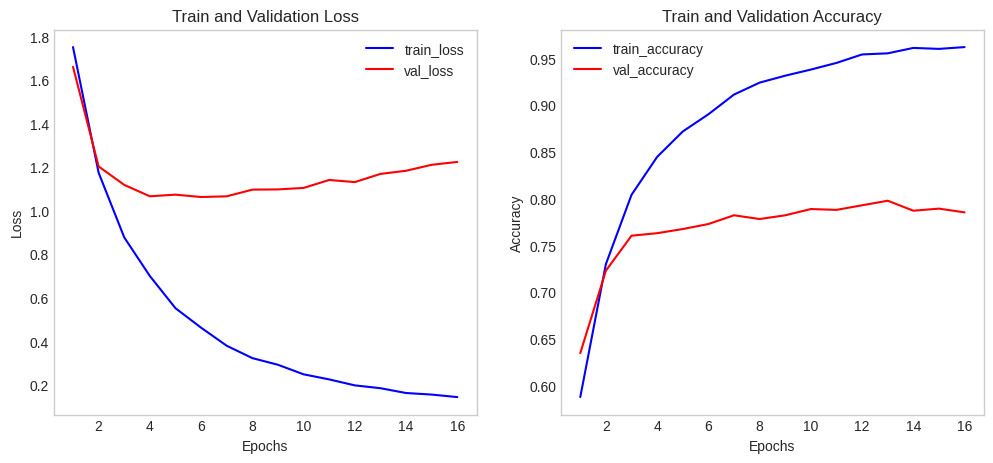

In [60]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt # Ensure matplotlib is imported

plt.style.use('seaborn-v0_8-whitegrid') # Corrected style name

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show() # 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# # [[YOUR CODE]]

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

In [61]:
 # 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7633 - loss: 1.0912
Test loss: 1.1325
Test accuracy: 0.7605


# CIFAR10 딥러닝 모델

## 데이터 로드 및 전처리

In [64]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [69]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [70]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

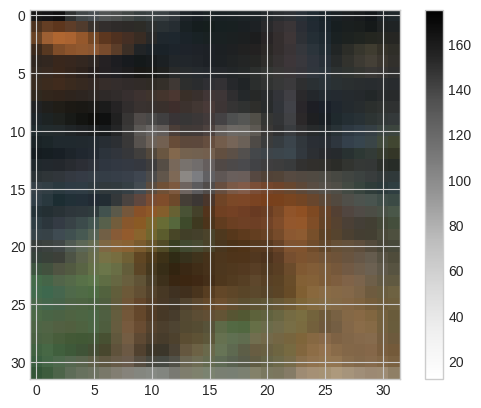

In [74]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [75]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [76]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [77]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

In [86]:
# model = models.Sequential()
# model.add(layers.Input(shape = (3072,)))
# model.add(layers.Dense(2048, activation = 'relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(2048, activation = 'relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1024, activation = 'relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense1024, activation = 'relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation = 'relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(512, activation = 'relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(10, activation = 'softmax'))

model = models.Sequential()
model.add(layers.Input(shape = (3072,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [87]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,843,210 (7.03 MB)

 Trainable params: 1,842,186 (7.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

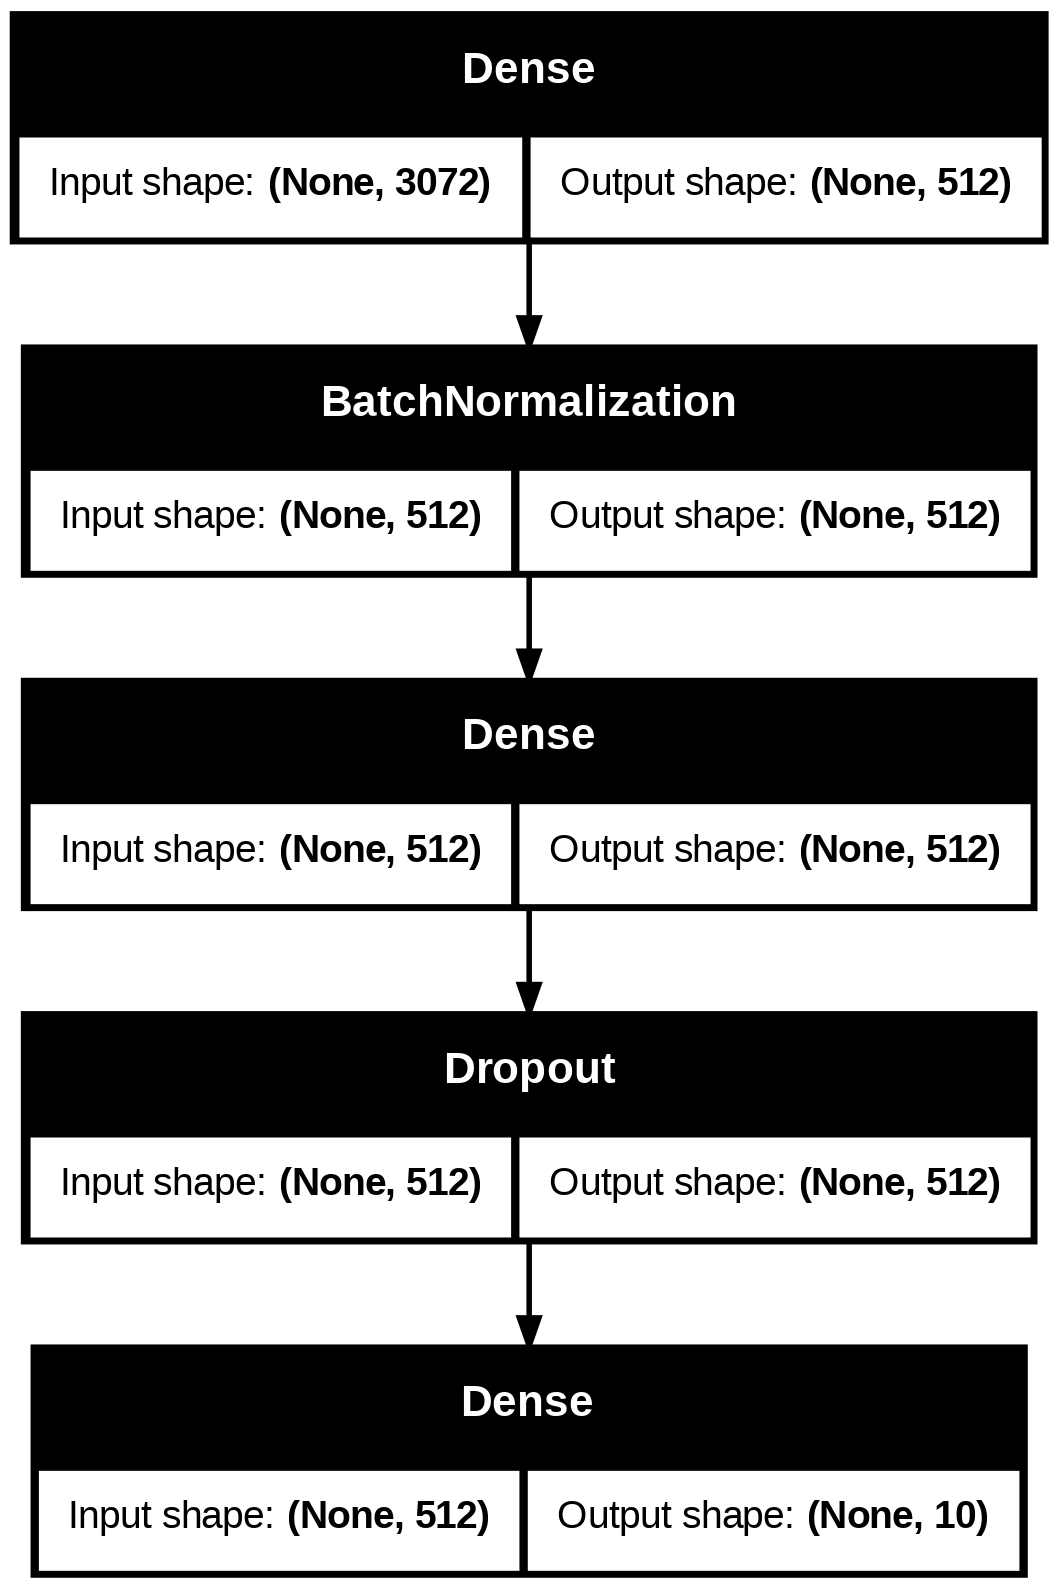

In [88]:
utils.plot_model(model, show_shapes=True)

## 모델 학습

In [89]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3079 - loss: 2.0312

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.3080 - loss: 2.0309 - val_accuracy: 0.3459 - val_loss: 1.8380
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4024 - loss: 1.6910

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.4024 - loss: 1.6910 - val_accuracy: 0.4211 - val_loss: 1.6500
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4269 - loss: 1.6199

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.4269 - loss: 1.6199 - val_accuracy: 0.4220 - val_loss: 1.6320
Epoch 4/40
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4475 - loss: 1.5654

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.4475 - loss: 1.5654 - val_accuracy: 0.4356 - val_loss: 1.5744
Epoch 5/40
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4618 - loss: 1.5239

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.4618 - loss: 1.5239 - val_accuracy: 0.4553 - val_loss: 1.5650
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.4781 - loss: 1.4820 - val_accuracy: 0.4480 - val_loss: 1.6037
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4862 - loss: 1.4562

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.4862 - loss: 1.4562 - val_accuracy: 0.4530 - val_loss: 1.5544
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4937 - loss: 1.4302

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.4937 - loss: 1.4302 - val_accuracy: 0.4739 - val_loss: 1.4884
Epoch 9/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.4973 - loss: 1.4158 - val_accuracy: 0.4461 - val_loss: 1.7018
Epoch 10/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.5019 - loss: 1.4097 - val_accuracy: 0.4498 - val_loss: 1.5661
Epoch 11/40
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5146 - loss: 1.3763

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.5146 - loss: 1.3763 - val_accuracy: 0.4873 - val_loss: 1.4818
Epoch 12/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.5169 - loss: 1.3613 - val_accuracy: 0.4688 - val_loss: 1.5420
Epoch 13/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.5271 - loss: 1.3475 - val_accuracy: 0.4713 - val_loss: 1.5356
Epoch 14/40
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5298 - loss: 1.3329

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.5297 - loss: 1.3329 - val_accuracy: 0.4970 - val_loss: 1.4763
Epoch 15/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5329 - loss: 1.3168

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.5329 - loss: 1.3168 - val_accuracy: 0.5089 - val_loss: 1.4025
Epoch 16/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.5321 - loss: 1.3227 - val_accuracy: 0.4663 - val_loss: 1.6061
Epoch 17/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.5338 - loss: 1.3091 - val_accuracy: 0.4937 - val_loss: 1.4928
Epoch 18/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.5447 - loss: 1.2897 - val_accuracy: 0.5019 - val_loss: 1.4348
Epoch 19/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.5408 - loss: 1.2880 - val_accuracy: 0.5033 - val_loss: 1.4424
Epoch 20/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.5443 - loss: 1.2830 - val_accuracy: 0.4747 - val_loss: 1.5058
Epoch 21/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.5474 - loss: 1.2723 - val_accuracy: 0.4971 - val_loss: 1.4634
Epoch 22/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.5559 - los

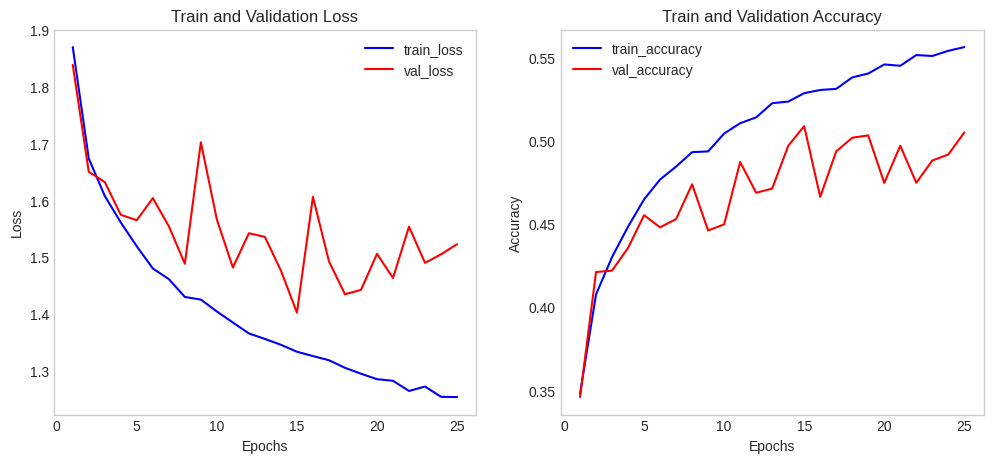

In [90]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [91]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5258 - loss: 1.3653
Test loss: 1.3797
Test accuracy: 0.5196
